In [1]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost shap


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load sample opioid dataset (simulated)
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"  # Placeholder
df = pd.read_csv(url)

# Display first 5 rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Check for null values
print(df.isnull().sum())

# Feature selection (drop columns if required)
# For now, we will use all columns

# Define Features and Target
X = df.drop('Outcome', axis=1)   # Features
y = df['Outcome']                # Target variable (High Risk = 1, Low Risk = 0)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
# Initialize and Train Model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



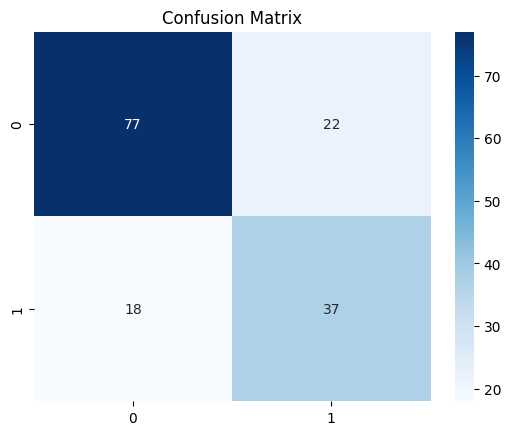

ROC-AUC Score: 0.8091827364554638


In [12]:
# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC-AUC Score:", roc_auc)


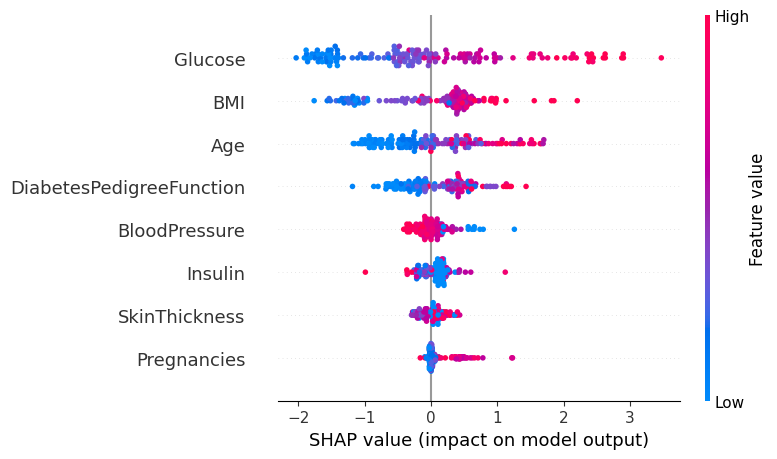

In [14]:
# Initialize SHAP TreeExplainer with additivity check disabled
explainer = shap.TreeExplainer(model, feature_perturbation="interventional")

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Plot Feature Importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


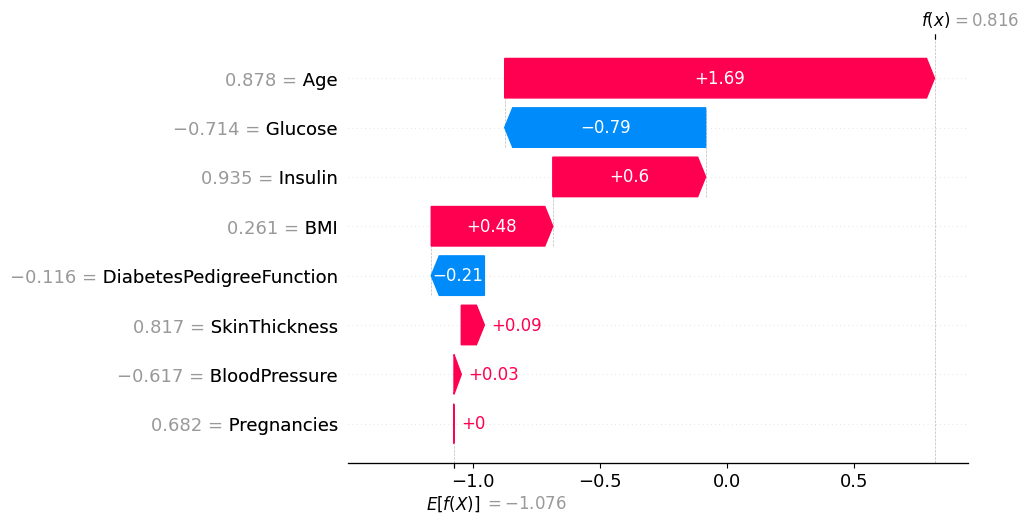

In [19]:
# SHAP Force Plot (Static Image for Google Colab)

# Prepare the data for a single prediction (e.g., index 0)
index = 0

# Create a Matplotlib force plot (works in Colab)
shap.plots.waterfall(shap.Explanation(values=shap_values[index],
                                      base_values=explainer.expected_value,
                                      data=X_test[index],
                                      feature_names=X.columns))



In [20]:
# Policy Recommendations based on SHAP Results

print("Policy Recommendations for Opioid Overdose Prevention:\n")

print("1. Age-Based Monitoring:")
print("   - Patients above age threshold (e.g., 50+) require frequent checkups & counseling.")

print("2. High Glucose & Insulin Level Patients:")
print("   - Monitor blood sugar control in opioid prescribed patients.")
print("   - Encourage diabetic management programs.")

print("3. BMI & Obesity Factors:")
print("   - Lifestyle interventions for high BMI patients.")

print("4. Personalized Healthcare:")
print("   - Use model explainability (SHAP) to provide patient-specific alerts.")

print("5. Data-Informed Policy Making:")
print("   - Government & hospitals should analyze patient clusters from model results.")
print("   - Allocate resources for high-risk zones or demographics.")

print("6. Ethical Usage:")
print("   - Ensure patient privacy & ethical data handling while deploying AI models.")

print("\nThese are machine-learning-driven recommendations for better opioid overdose prevention strategy.")


Policy Recommendations for Opioid Overdose Prevention:

1. Age-Based Monitoring:
   - Patients above age threshold (e.g., 50+) require frequent checkups & counseling.
2. High Glucose & Insulin Level Patients:
   - Monitor blood sugar control in opioid prescribed patients.
   - Encourage diabetic management programs.
3. BMI & Obesity Factors:
   - Lifestyle interventions for high BMI patients.
4. Personalized Healthcare:
   - Use model explainability (SHAP) to provide patient-specific alerts.
5. Data-Informed Policy Making:
   - Government & hospitals should analyze patient clusters from model results.
   - Allocate resources for high-risk zones or demographics.
6. Ethical Usage:
   - Ensure patient privacy & ethical data handling while deploying AI models.

These are machine-learning-driven recommendations for better opioid overdose prevention strategy.


In [21]:
import joblib

# Save Model
joblib.dump(model, 'opioid_overdose_model.pkl')

# Save Scaler
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [22]:
from google.colab import files

# Download Model
files.download('opioid_overdose_model.pkl')

# Download Scaler
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
import numpy as np

# New Patient Data
new_patient = np.array([[45, 150, 85, 28.5, 0.351, 30, 80, 2]])

# Scale new patient data
new_patient_scaled = scaler.transform(new_patient)

# Predict
risk = model.predict(new_patient_scaled)

if risk[0] == 1:
    print("High Risk of Opioid Overdose!")
else:
    print("Low Risk of Opioid Overdose.")


High Risk of Opioid Overdose!


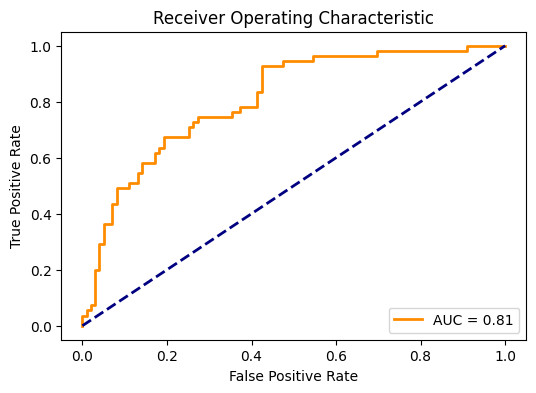

In [25]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_proba = model.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
